# Import Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [3]:
data = pd.read_csv('../dataset/bitcoin_price.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

In [4]:
# Convert 'Date' to datetune and set as index
data['Date'] = pd.to_datetime(data['Date'], format = "%Y-%m-%d")
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
# Select the Bitcoin Data for
# data.loc['2023']          # Select by year
# data.loc['2023-11']       # Select by year and month
data.loc['2023-11-16']      # Select by year, month, and date

Open         3.787998e+04
High         3.793462e+04
Low          3.554547e+04
Close        3.615477e+04
Adj Close    3.615477e+04
Volume       2.600739e+10
Name: 2023-11-16 00:00:00, dtype: float64

In [6]:
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

Another shorter approach is to use pd.read_csv with some arguments.

In [7]:
# Loading the Data and Setting the index
otherdata = pd.read_csv("../dataset/bitcoin_price.csv", index_col="Date")
otherdata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
otherdata.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
       '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30'],
      dtype='object', name='Date', length=3392)

The dtype is object, which is not what we want, the standard for timeseries is a datetime data type. we can do it by adding the parse_date arguments like below.

In [9]:
otherdata = pd.read_csv("../dataset/bitcoin_price.csv", index_col="Date", parse_dates=True)
otherdata.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

Now the dtype for the index is correct.

In [10]:
# Resampling to monthly frequency and calculate the mean closing price
data.resample('M').mean()           # M for monthly, W for weekly

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_84990/3855149256.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').mean()           # M for monthly, W for weekly


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10


# Exploring Data

We'll look at some key metrics used for time series data

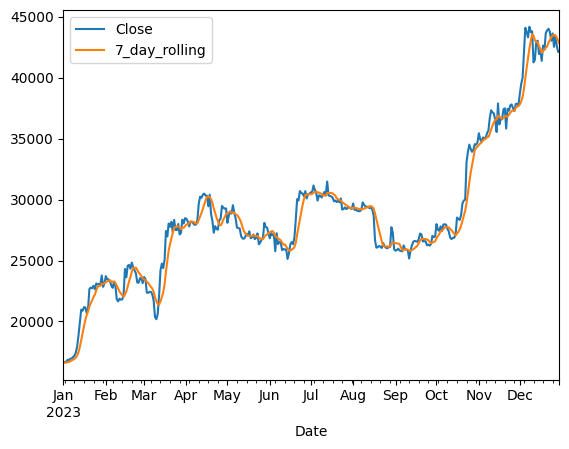

In [29]:
# 7-Day rolling average of the closing price
data['7_day_rolling'] = data['Close'].rolling(window=7).mean()
data[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [33]:
# Find out the highest average month
data.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

we can calculate daily returns such as if the closing value today is 101 and tomorrow is 100, meaning we have 1% return. We can do it simply by using pct_change().

In [37]:
# Calculate Daily Returns
data['daily_returns'] = data['Close'].pct_change() * 100

In [39]:
# Days with more than 10% change in closing price
data[abs(data['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


# Data Visualization

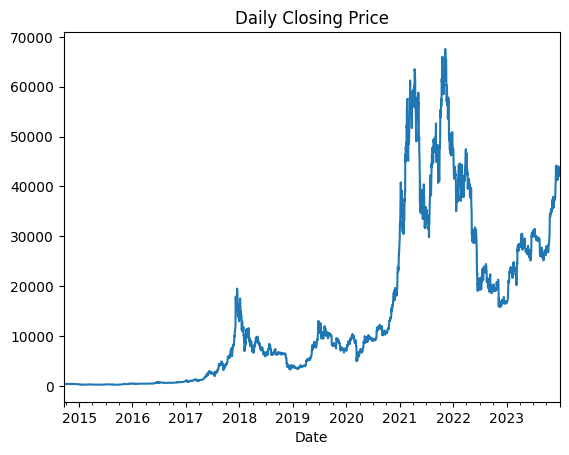

In [42]:
# Daily Closing Price Plot
data['Close'].plot(title='Daily Closing Price')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_84990/1941137415.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data.resample('Y').sum()['Volume'].plot()


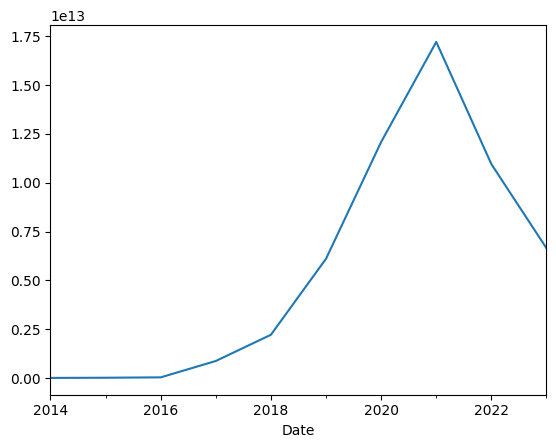

In [47]:
# Plot the yearly volume
data.resample('Y').sum()['Volume'].plot()
plt.show()

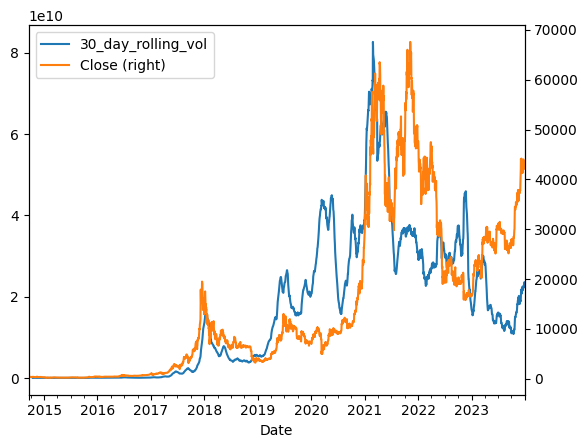

In [ ]:
# Plot Closing price and 30-day rolling volume
data['30_day_rolling_vol'] = data['Volume'].rolling(window=30).mean()
data['30_day_rolling_vol'].plot(legend=True)
ax = data['Close'].plot(secondary_y=True, legend=True)
ax.set_ylabel('Volume')
plt.show()

In [ ]:
# Correlation between the 30-day rolling volume and the closing price
data[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation